In [99]:
!pip install pyspark

In [100]:
!pip install findspark

In [101]:
import findspark
findspark.init()
findspark.find()

'/usr/local/lib/python3.10/dist-packages/pyspark'

In [214]:
import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.sql.functions import udf,col,sum,when,lit
from pyspark.sql.types import StringType, IntegerType
import numpy as np
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [ ]:
sc = SparkContext(appName= "Birds Classification")
sql = SQLContext(sc)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
df = 'birds_india.csv'
data = sql.read.csv(df,header = True)

In [ ]:
data.count()

14301

In [ ]:
data.dtypes

[('id', 'string'),
 ('gen', 'string'),
 ('sp', 'string'),
 ('ssp', 'string'),
 ('en', 'string'),
 ('rec', 'string'),
 ('cnt', 'string'),
 ('loc', 'string'),
 ('lat', 'string'),
 ('lng', 'string'),
 ('alt', 'string'),
 ('type', 'string'),
 ('url', 'string'),
 ('file', 'string'),
 ('file-name', 'string'),
 ('sono', 'string'),
 ('lic', 'string'),
 ('q', 'string'),
 ('length', 'string'),
 ('time', 'string'),
 ('date', 'string'),
 ('uploaded', 'string'),
 ('also', 'string'),
 ('rmk', 'string'),
 ('bird-seen', 'string'),
 ('playback-used', 'string')]

In [ ]:
data.limit(5).toPandas()

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
0,429767,Dendrocygna,bicolor,None,Fulvous Whistling Duck,Sreekumar Chirukandoth,India,"OMR - Medavakkam Toll Gate (near Chennai), Ka...",12.9011,80.2199,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:08,07:00,2017-08-27,2018-08-08,"['Corvus splendens', 'Tachybaptus ruficollis']",Call of a single bird flying in to join a smal...,yes,no
1,369151,Dendrocygna,javanica,None,Lesser Whistling Duck,Peter Boesman,India,"Near Chouldari, South Andaman County, Andaman ...",11.63,92.67,...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:18,15:00,2017-04-23,2017-05-12,[''],None,unknown,unknown
2,369150,Dendrocygna,javanica,None,Lesser Whistling Duck,Peter Boesman,India,"Near Chouldari, South Andaman County, Andaman ...",11.63,92.67,...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:30,15:00,2017-04-23,2017-05-12,[''],None,unknown,unknown
3,178554,Dendrocygna,javanica,None,Lesser Whistling Duck,Eveny Luis,India,"Goncoi, Aldona,Bardez, Goa",15.5966,73.8729,...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:06,19:17,2014-05-18,2014-05-18,[''],None,yes,no
4,472687,Dendrocygna,javanica,None,Lesser Whistling Duck,Peter Boesman,India,"Keoladeo National Park, Bharatpur, Rajasthan",27.1593,77.5232,...,//creativecommons.org/licenses/by-nc-nd/4.0/,B,0:27,10:30,2019-04-06,2019-05-10,['Mycteria leucocephala'],Calls of a small group,unknown,unknown


In [ ]:
data.groupBy('en').count().show()

+--------------------+-----+
|                  en|count|
+--------------------+-----+
|     Sclater's Monal|    2|
|    Oriental Bay Owl|    3|
|Heart-spotted Woo...|   17|
|Grey-cheeked Warbler|   24|
|   Northern Shoveler|    3|
|      Andaman Coucal|   11|
|         Horned Lark|    1|
|      Ruddy Shelduck|   20|
|           Watercock|    3|
|  Black-necked Crane|    3|
|  Blue-faced Malkoha|    1|
|        Rosy Minivet|    4|
|    Rufous-naped Tit|   10|
|  Painted Bush Quail|   12|
|Silver-breasted B...|    3|
| then again conti...|    1|
| Black-naped Monarch|   31|
|  Common Buttonquail|    1|
|       Laggar Falcon|    2|
| Eastern Jungle Crow|    6|
+--------------------+-----+
only showing top 20 rows



In [ ]:
index = [StringIndexer(inputCol = column, outputCol = column+"_index").fit(data) for column in ['en']]

pipeline = Pipeline(stages=index)
datar = pipeline.fit(data).transform(data)

In [ ]:
datar.limit(5).toPandas()

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used,en_index
0,429767,Dendrocygna,bicolor,None,Fulvous Whistling Duck,Sreekumar Chirukandoth,India,"OMR - Medavakkam Toll Gate (near Chennai), Ka...",12.9011,80.2199,...,A,0:08,07:00,2017-08-27,2018-08-08,"['Corvus splendens', 'Tachybaptus ruficollis']",Call of a single bird flying in to join a smal...,yes,no,919.0
1,369151,Dendrocygna,javanica,None,Lesser Whistling Duck,Peter Boesman,India,"Near Chouldari, South Andaman County, Andaman ...",11.63,92.67,...,A,0:18,15:00,2017-04-23,2017-05-12,[''],None,unknown,unknown,310.0
2,369150,Dendrocygna,javanica,None,Lesser Whistling Duck,Peter Boesman,India,"Near Chouldari, South Andaman County, Andaman ...",11.63,92.67,...,A,0:30,15:00,2017-04-23,2017-05-12,[''],None,unknown,unknown,310.0
3,178554,Dendrocygna,javanica,None,Lesser Whistling Duck,Eveny Luis,India,"Goncoi, Aldona,Bardez, Goa",15.5966,73.8729,...,A,0:06,19:17,2014-05-18,2014-05-18,[''],None,yes,no,310.0
4,472687,Dendrocygna,javanica,None,Lesser Whistling Duck,Peter Boesman,India,"Keoladeo National Park, Bharatpur, Rajasthan",27.1593,77.5232,...,B,0:27,10:30,2019-04-06,2019-05-10,['Mycteria leucocephala'],Calls of a small group,unknown,unknown,310.0


In [138]:
df1 = pd.read_csv("birds.csv")
df1

,id,gen,sp,ssp,en,lat,lng,alt,q,type,rec,rmk,bird-seen
0,429767,Dendrocygna,bicolor,NaN,Fulvous Whistling Duck,12.9011,80.2199,0,A,flight call,Sreekumar Chirukandoth,Call of a single bird flying in to join a smal...,yes
1,369151,Dendrocygna,javanica,NaN,Lesser Whistling Duck,11.6300,92.6700,NaN,A,call,Peter Boesman,NaN,unknown
2,369150,Dendrocygna,javanica,NaN,Lesser Whistling Duck,11.6300,92.6700,NaN,A,call,Peter Boesman,NaN,unknown
3,178554,Dendrocygna,javanica,NaN,Lesser Whistling Duck,15.5966,73.8729,20,A,flight call,Eveny Luis,NaN,yes
4,472687,Dendrocygna,javanica,NaN,Lesser Whistling Duck,27.1593,77.5232,NaN,B,Call,Peter Boesman,Calls of a small group,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13649,548597,Mystery,mystery,NaN,Identity unknown,12.2908,76.5990,750,E,"call, life stage uncertain, sex uncertain, song",Niranjan Murthy K R,Want to identify the bird with song & also the...,no
13650,461580,Mystery,mystery,NaN,Identity unknown,21.1279,79.0499,320,E,call,Dr. Ravikumar Dumpala,"call i heard from canopy of a big tree, one re...",no
13651,358434,Mystery,mystery,NaN,Identity unknown,25.6321,93.6768,360,E,call,BIndyamc,Flies in circle late evenings and early mornings,no
13652,347185,Mystery,mystery,NaN,Identity unknown,11.3628,76.7979,1800,E,call,Aravind Amirtharaj,Its a dense shola forest. this call is heared ...,no


In [139]:
ft = ['gen','sp','ssp','en','alt','q','rec','type','rmk','bird-seen']
encoder = LabelEncoder()

# Encode the categorical columns
for col in ft:
    df1[col] = encoder.fit_transform(df1[col])
df1

,id,gen,sp,ssp,en,lat,lng,alt,q,type,rec,rmk,bird-seen
0,429767,116,89,493,317,12.9011,80.2199,6,0,382,391,1088,2
1,369151,116,389,493,528,11.6300,92.6700,252,0,261,268,4646,1
2,369150,116,389,493,528,11.6300,92.6700,252,0,261,268,4646,1
3,178554,116,389,493,528,15.5966,73.8729,80,0,382,119,4646,2
4,472687,116,389,493,528,27.1593,77.5232,252,1,34,268,1326,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13649,548597,260,511,493,446,12.2908,76.5990,228,4,324,246,4073,0
13650,461580,260,511,493,446,21.1279,79.0499,147,4,261,113,4298,0
13651,358434,260,511,493,446,25.6321,93.6768,165,4,261,61,1570,0
13652,347185,260,511,493,446,11.3628,76.7979,61,4,261,48,2053,0


In [152]:
df1 = df1.fillna(0)

In [153]:
df1

,id,gen,sp,ssp,en,lat,lng,alt,q,type,rec,rmk,bird-seen
0,429767,116,89,493,317,12.9011,80.2199,6,0,382,391,1088,2
1,369151,116,389,493,528,11.6300,92.6700,252,0,261,268,4646,1
2,369150,116,389,493,528,11.6300,92.6700,252,0,261,268,4646,1
3,178554,116,389,493,528,15.5966,73.8729,80,0,382,119,4646,2
4,472687,116,389,493,528,27.1593,77.5232,252,1,34,268,1326,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13649,548597,260,511,493,446,12.2908,76.5990,228,4,324,246,4073,0
13650,461580,260,511,493,446,21.1279,79.0499,147,4,261,113,4298,0
13651,358434,260,511,493,446,25.6321,93.6768,165,4,261,61,1570,0
13652,347185,260,511,493,446,11.3628,76.7979,61,4,261,48,2053,0


In [154]:
x = df1.loc[:, ["lat", "lng", "alt",'gen','sp','ssp','rec','q','type']]
y = df1["en"]

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.0008,random_state=0)

In [268]:
# Create an SVM classifier
KNN = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
KNN.fit(x_train, y_train)

# Predict the labels for the test data
KNN_pred = KNN.predict(x_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test,KNN_pred)

print("Accuracy:", accuracy*100,"%")

Accuracy: 63.63636363636363 %


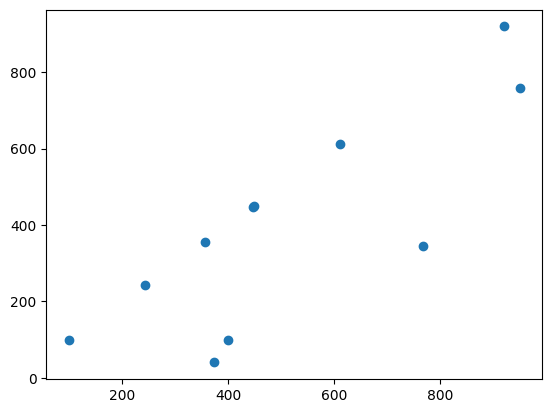

In [266]:
import matplotlib.pyplot as plt
plt.scatter(y_test,KNN_pred)